# Set backend to be able to visualize emojis in plots

In [1]:
import mplcairo
import matplotlib
print('Default backend: ' + matplotlib.get_backend()) 
matplotlib.use("module://mplcairo.base")
print('Backend is now ' + matplotlib.get_backend())

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import emoji
import matplotlib.font_manager as font_manager
import collections

import ipykernel
%matplotlib inline
ipykernel.pylab.backend_inline.new_figure_manager = mplcairo.base.new_figure_manager
%matplotlib inline
print('Interactive backend is now ' + matplotlib.get_backend())

Default backend: module://ipykernel.pylab.backend_inline
Backend is now module://mplcairo.base
Interactive backend is now module://ipykernel.pylab.backend_inline


# Compare lengths of train/validation/test

In [32]:
def print_stats(name, inp_dir):
    turns = pickle.load(open(inp_dir+'conversation_length.pkl', 'rb'))
    print (name)
    print ('\t# turns: ', len(turns), '\n\t# sentences: ', sum(turns), '\n')
    
print_stats('Train', 'datasets/cornell/train/')
print_stats('Validation', 'datasets/cornell/valid/')
print_stats('Test', 'datasets/cornell/test/')

Train
	# turns:  66477 
	# sentences:  233106 

Validation
	# turns:  8310 
	# sentences:  29209 

Test
	# turns:  8310 
	# sentences:  28932 



In [33]:
train_probs = pickle.load(open('datasets/cornell/train/sentences_emojis.pkl', 'rb'))
valid_probs = pickle.load(open('datasets/cornell/valid/sentences_emojis.pkl', 'rb'))
test_probs = pickle.load(open('datasets/cornell/test/sentences_emojis.pkl', 'rb'))
print ('Number of emojized training sentences', len(train_probs))
print ('Number of emojized validation sentences', len(valid_probs))
print ('Number of emojized test sentences', len(test_probs))

Number of emojized training sentences 11393
Number of emojized validation sentences 29185
Number of emojized test sentences 28911


In [4]:
# Emoji map in emoji_overview.png
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: \
:pensive: :ok_hand: :blush: :heart: :smirk: \
:grin: :notes: :flushed: :100: :sleeping: \
:relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: \
:sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: \
:neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: \
:v: :sunglasses: :rage: :thumbsup: :cry: \
:sleepy: :yum: :triumph: :hand: :mask: \
:clap: :eyes: :gun: :persevere: :smiling_imp: \
:sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: \
:wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: \
:angry: :no_good: :muscle: :facepunch: :purple_heart: \
:sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')

# What is the overall distribution of softmax outputs?

Distribution of softmax predictions for 64 emojis - train


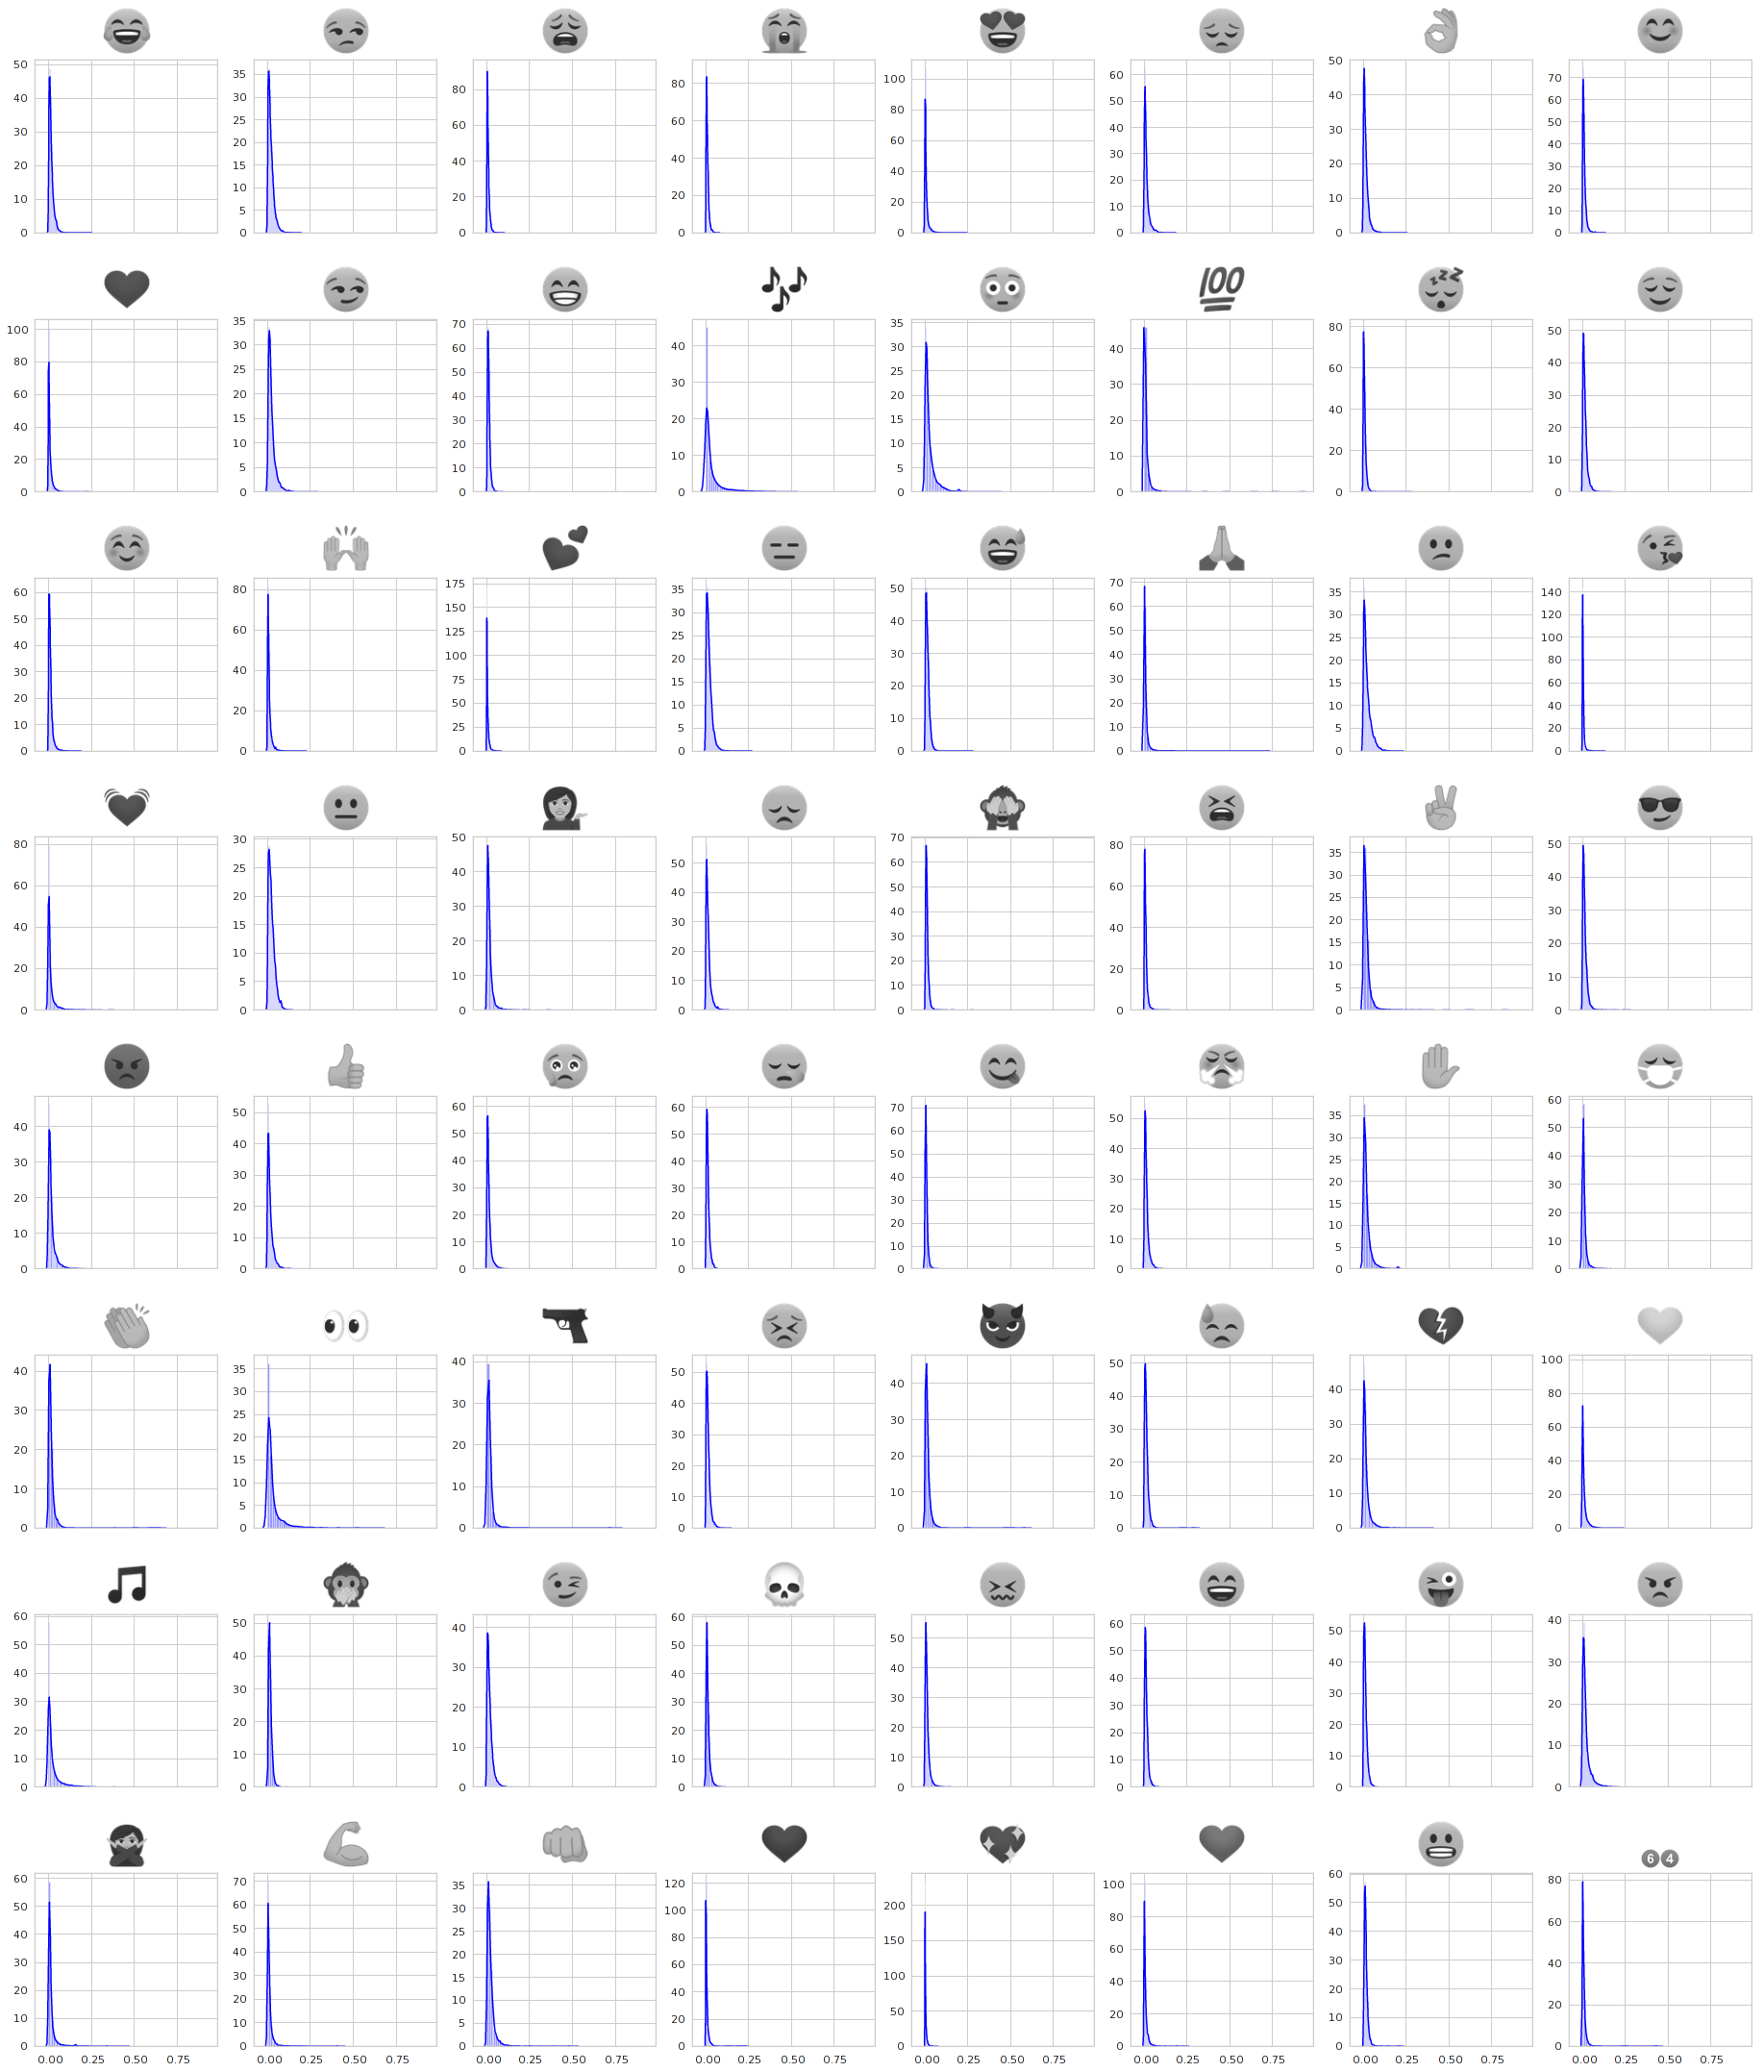

Distribution of softmax predictions for 64 emojis - validation


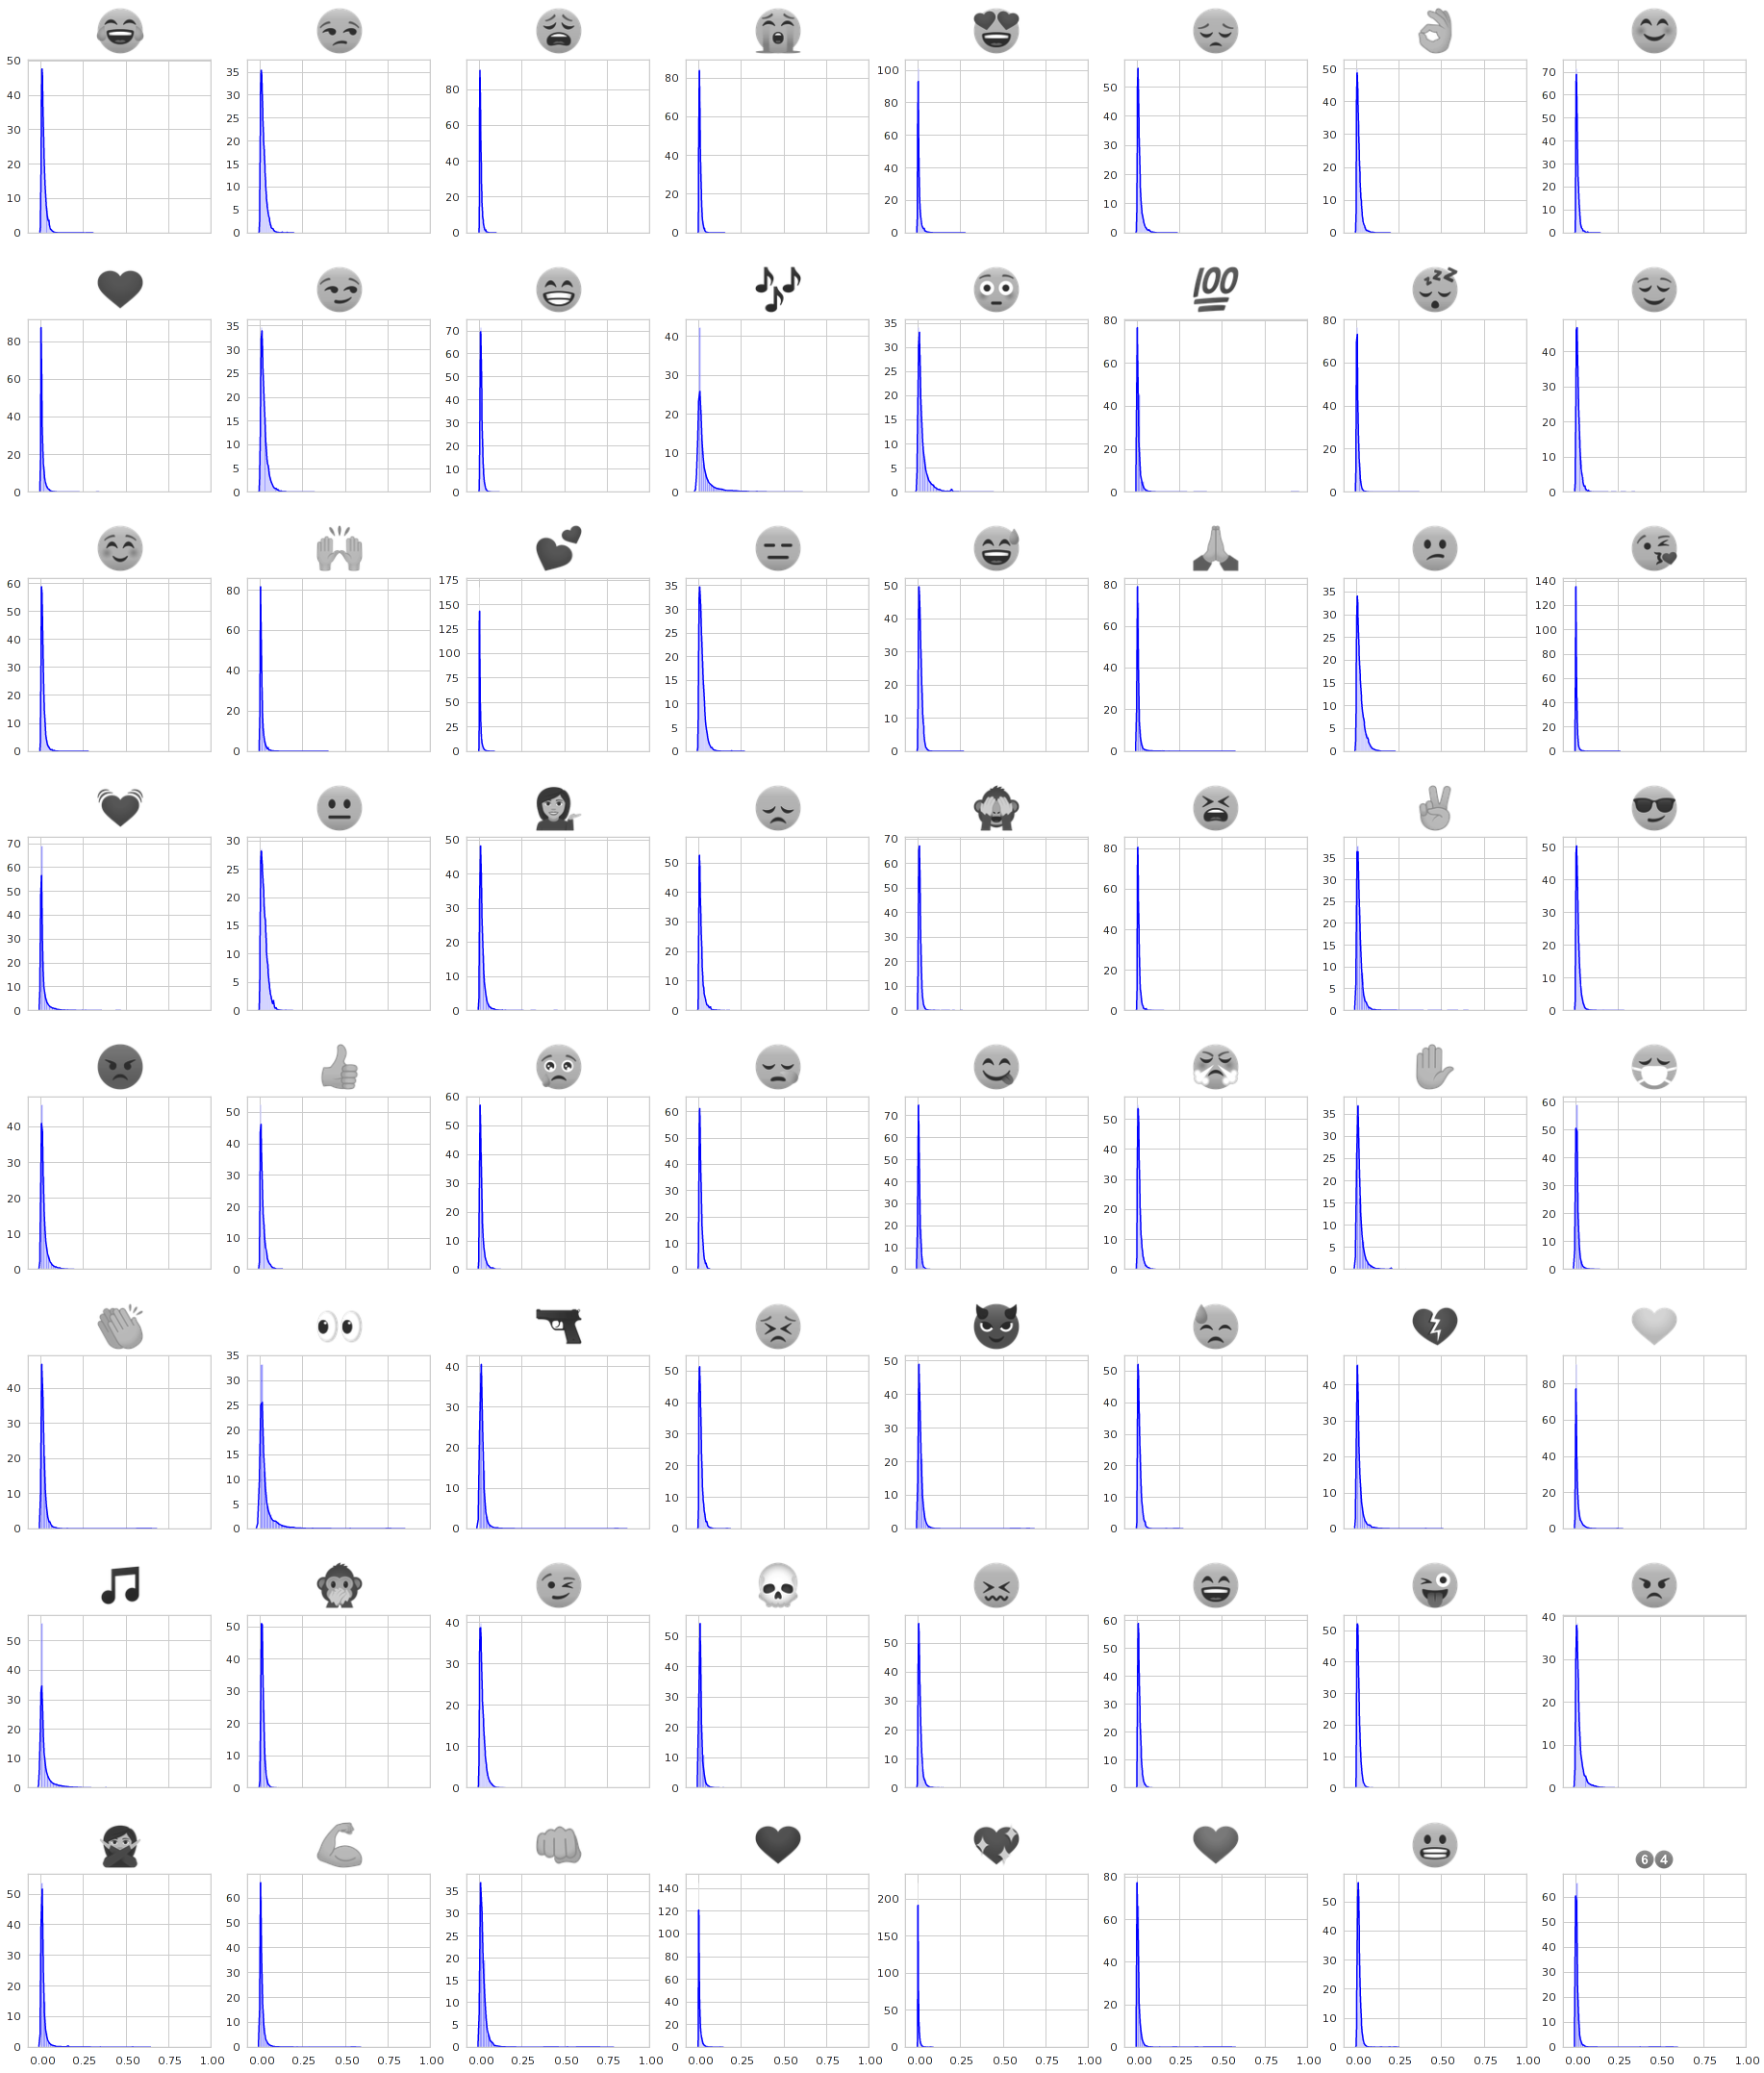

In [30]:
# Plot emoji distribution
# Input:
# name: to be used in the title
# probs - an array of X*64
def plot_emoji_dist(name, probs):
    print('Distribution of softmax predictions for 64 emojis - '+name)
    font_prop = font_manager.FontProperties(fname='/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/apple/emojione-mac.ttc')
    font = {'fontproperties': font_prop, 'fontsize': 50}
    sns.set(style="whitegrid", palette="muted", color_codes=True)
    f, axes = plt.subplots(8, 8, figsize=(32, 38), sharex=True)
    plt.subplots_adjust(hspace=0.5)
    for i in range(len(EMOJIS)):
        sns.distplot(probs[:, i], label=emoji.emojize(EMOJIS[i], use_aliases=True), color='blue',
                     ax=axes[int(i/8), int(i%8)]).set_title(emoji.emojize(EMOJIS[i], use_aliases=True), **font)
    plt.title('Distribution of softmax predictions for 64 emojis - '+name, fontsize=20)
    plt.savefig(name+'_emoji_probs.png')
    plt.show()
    

plot_emoji_dist('train', np.asarray(train_probs))
plot_emoji_dist('validation', np.asarray(valid_probs))

Distribution of softmax predictions for 64 emojis - test


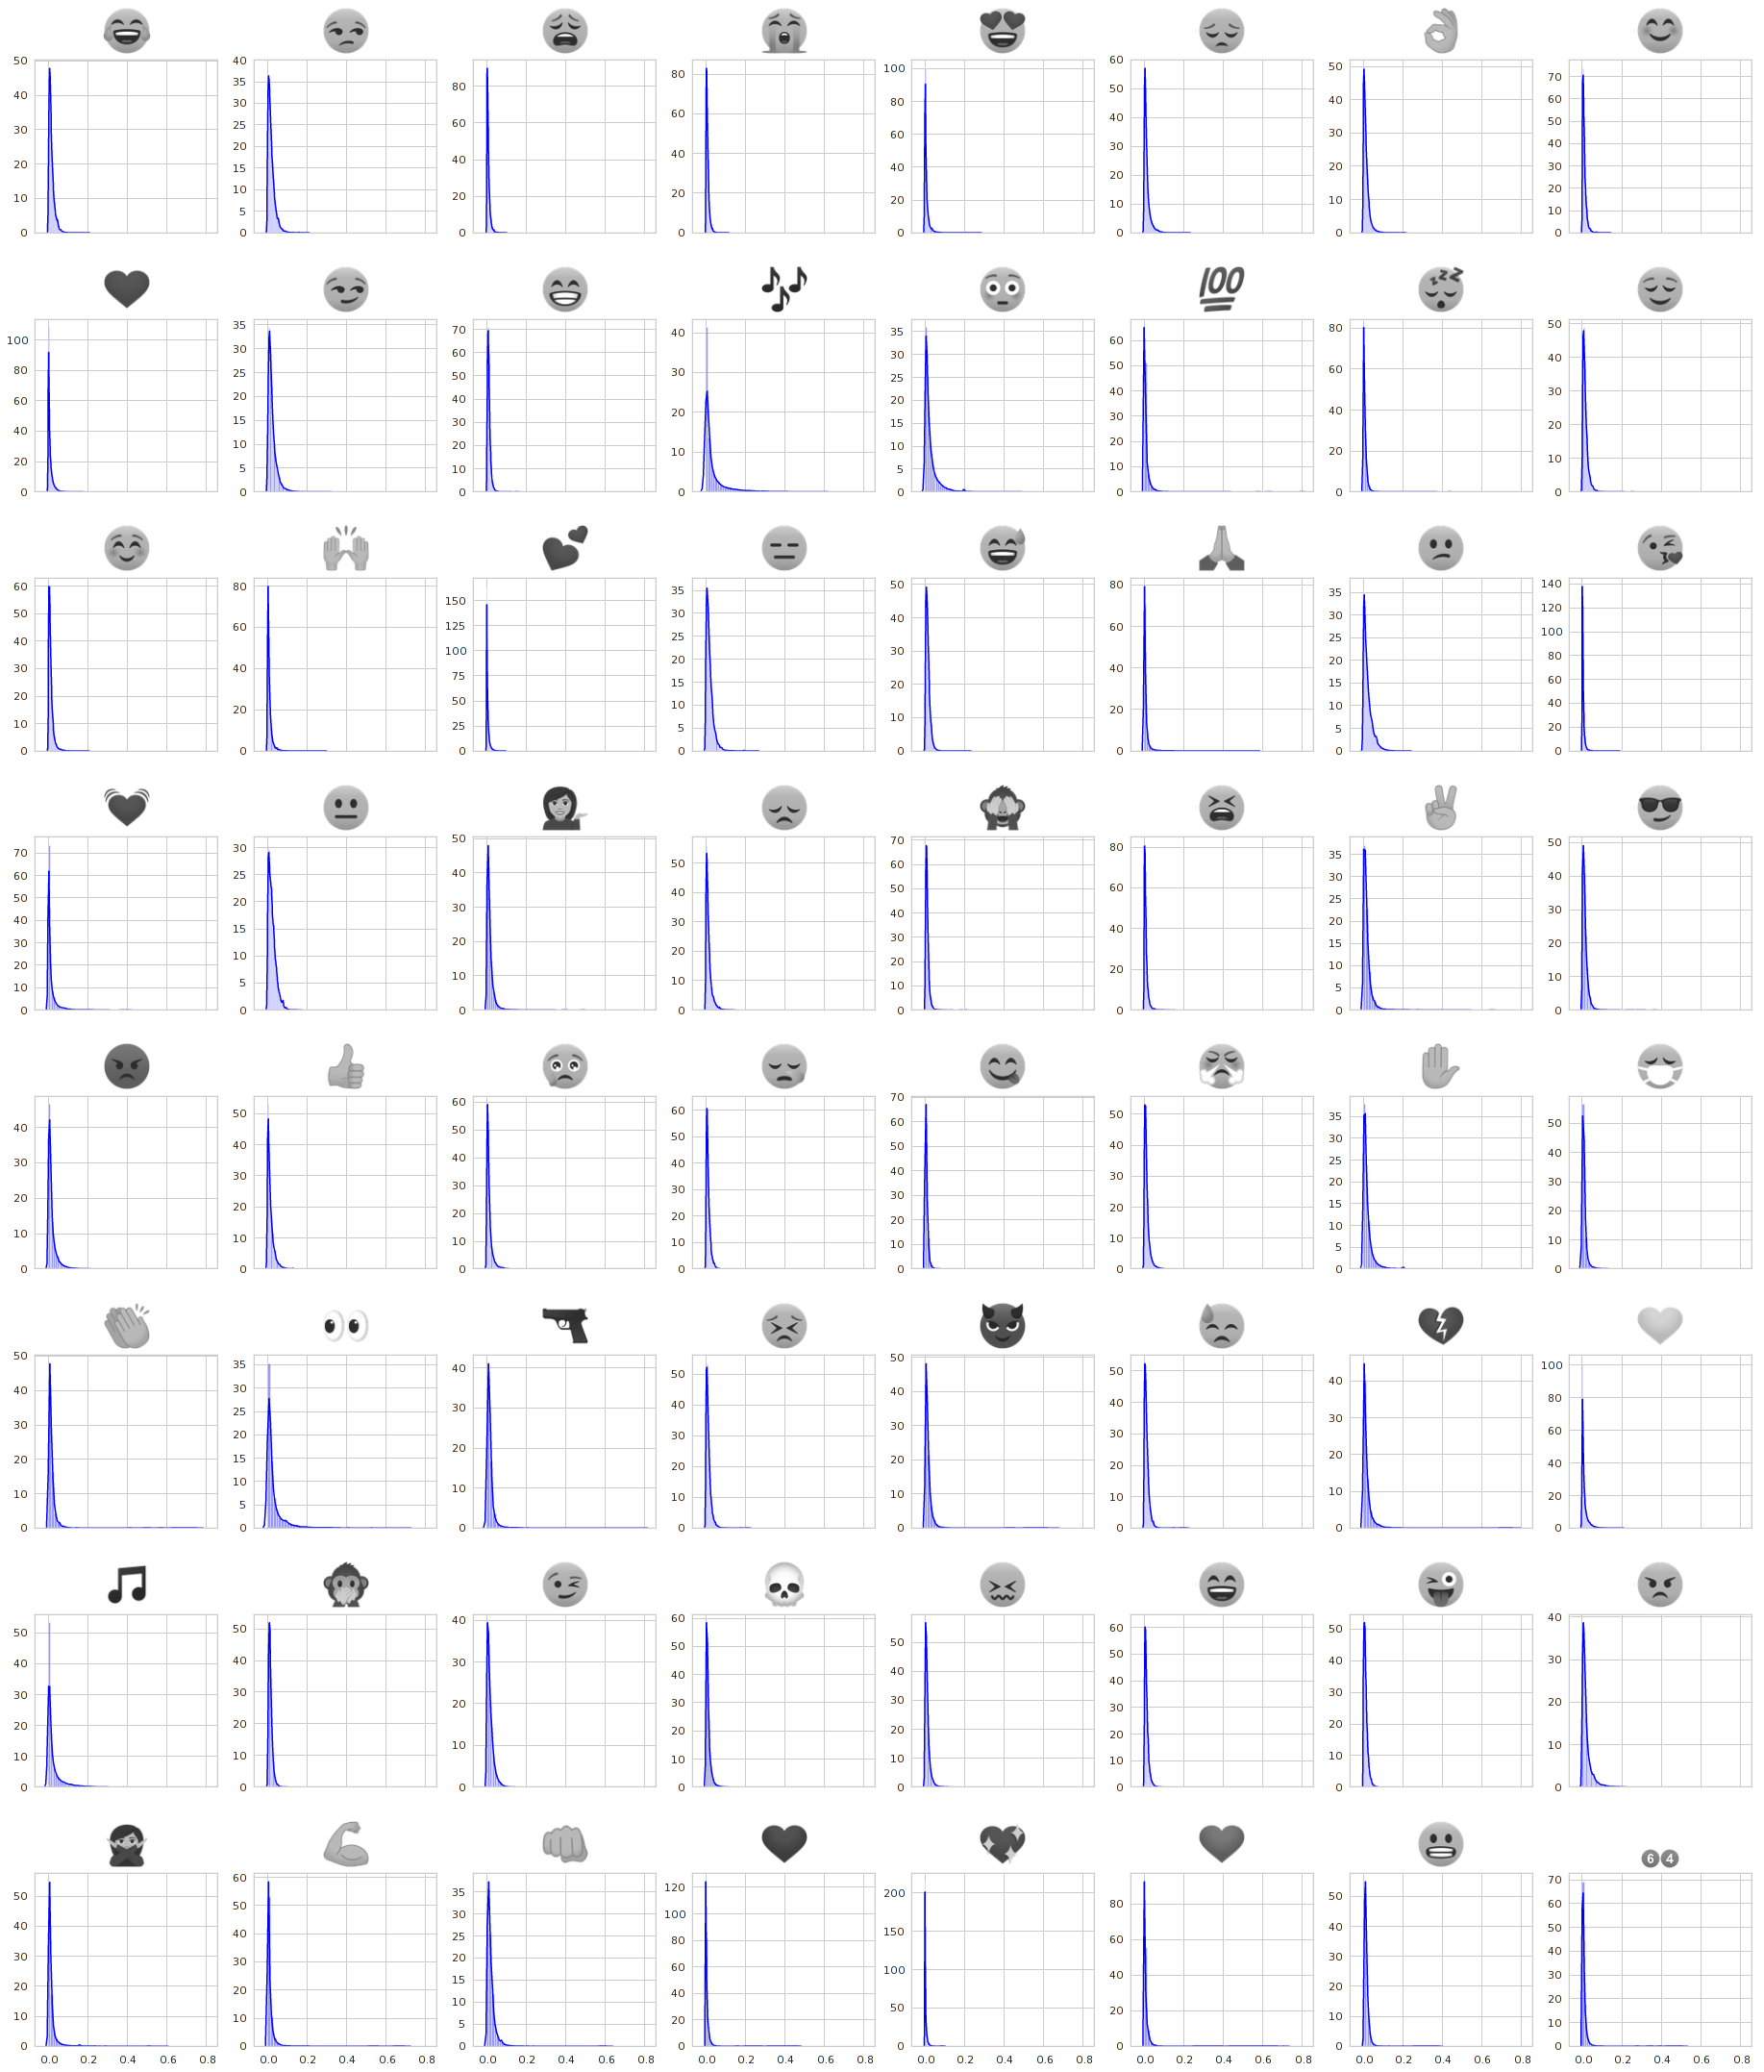

In [34]:
plot_emoji_dist('test', np.asarray(test_probs))

# What are the softmax values of the top 1 prediction?

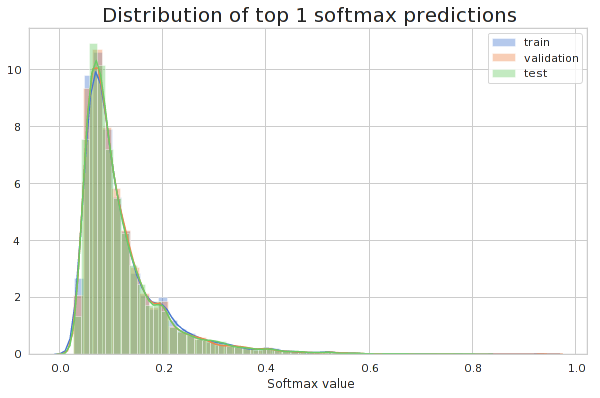

In [35]:
# Plot top 1 emoji distribution
# Input:
# inp_dict: a dictionary of name (title to be used on the image) and probs (an array of X*64)

def plot_top1_softmax_hists(inp_dict):
    plt.figure(figsize=(10,6))
    for key in inp_dict.keys():
        plot_top1_softmax_hist(key, np.asarray(inp_dict[key]))
    plt.legend()
    plt.savefig('probs_distribution.png')
    plt.show()
    
def plot_top1_softmax_hist(name, probs):
    sns.distplot(np.max(probs, axis=1), label=name)
    plt.title('Distribution of top 1 softmax predictions', fontsize=20)
    plt.xlabel('Softmax value')

inp_dict = {'train': train_probs, 'validation': valid_probs, 'test': test_probs}
plot_top1_softmax_hists(inp_dict)

# What is the distribution of top 1 predicted emoji, with at least some confidence?

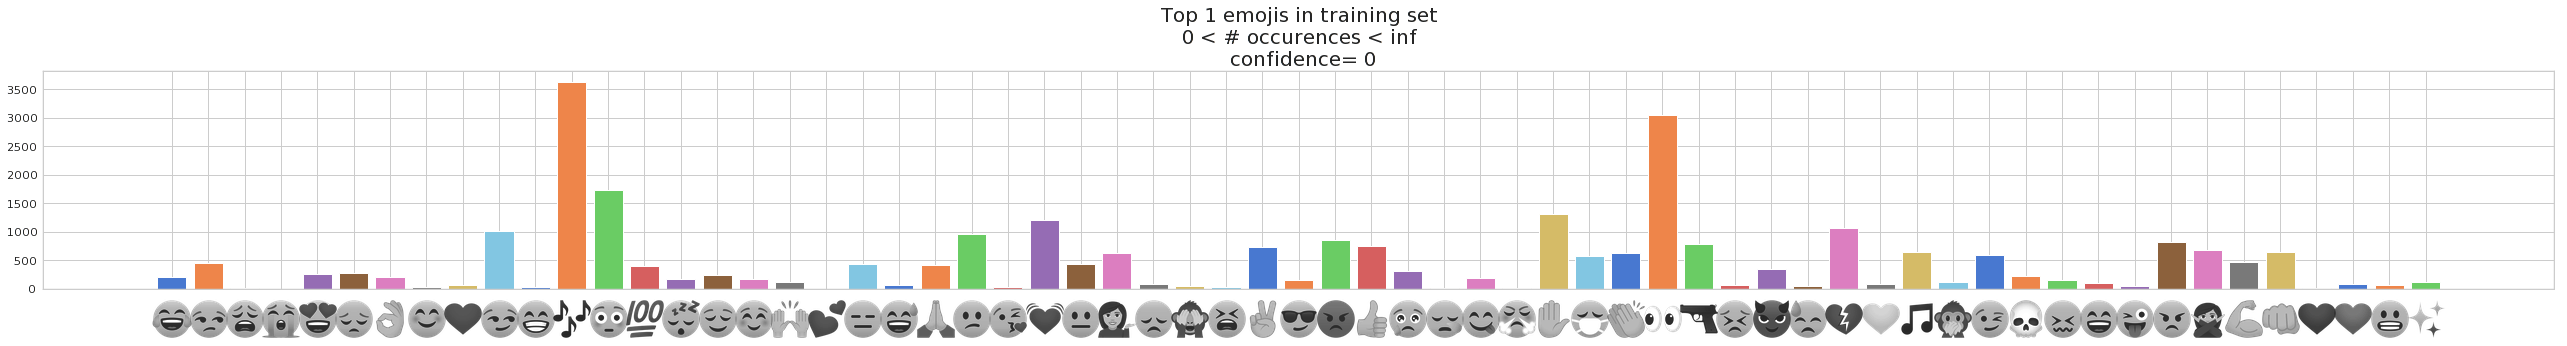

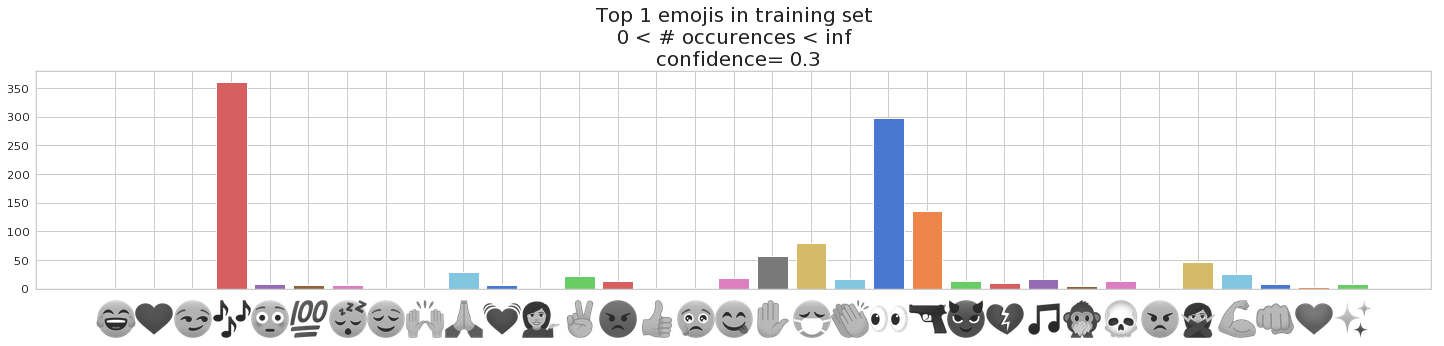

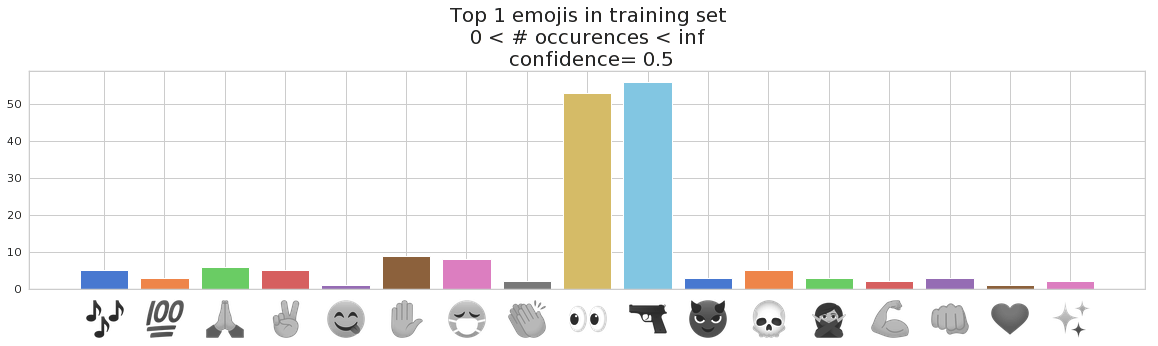

In [8]:
# Plot top 1 emoji distribution
# Input: 
# probs - an array of X*64
# threhold - confidence threhold (between 0.0 and 1.0)
# min_t - minimum number of occurences
# max_t - maximum number of occurences


def plot_top1_emoji_dist(probs, threshold, min_t, max_t, fig_width=20):
    _bins = range(len(EMOJIS))
    font_prop = font_manager.FontProperties(fname='/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/apple/emojione-mac.ttc')
    font = {'fontproperties': font_prop, 'fontsize': 40}
    plt.figure(figsize=(fig_width,4))
    vals = np.amax(probs, axis=1)
    indices = np.argmax(probs, axis=1)
    sub_indices = []
    for i, index in enumerate(indices):
        if vals[i]>threshold:
            sub_indices.append(index)
        
    frequencies = collections.Counter(sub_indices)
    keys = [key for key in range(len(EMOJIS)) if frequencies[key]>min_t and frequencies[key]<max_t]
    for idx, key in enumerate(keys):
        plt.bar(idx, frequencies[key])
    plt.xticks(range(len(keys)), [emoji.emojize(EMOJIS[i], use_aliases=True) for i in keys], **font)
    plt.title(f'Top 1 emojis in training set\n{min_t} < # occurences < {max_t}\n confidence= {threshold}', fontsize=20)

#     plt.savefig('emoji_pobs.png')
    plt.show()

# plot_top1_emoji_dist(np.asarray(train_probs), 0, 0, 10)
# plot_top1_emoji_dist(np.asarray(train_probs), 0, 10, 50000)
plot_top1_emoji_dist(np.asarray(train_probs), 0, 0, np.inf, fig_width=45)


# plot_top1_emoji_dist(np.asarray(train_probs), 0.3, 0, 10)
plot_top1_emoji_dist(np.asarray(train_probs), 0.3, 0, np.inf, fig_width=25)

# plot_top1_emoji_dist(np.asarray(train_probs), 0.5, 0, 10)
plot_top1_emoji_dist(np.asarray(train_probs), 0.5, 0, np.inf)


# Emoji distributions, original twitter dataset

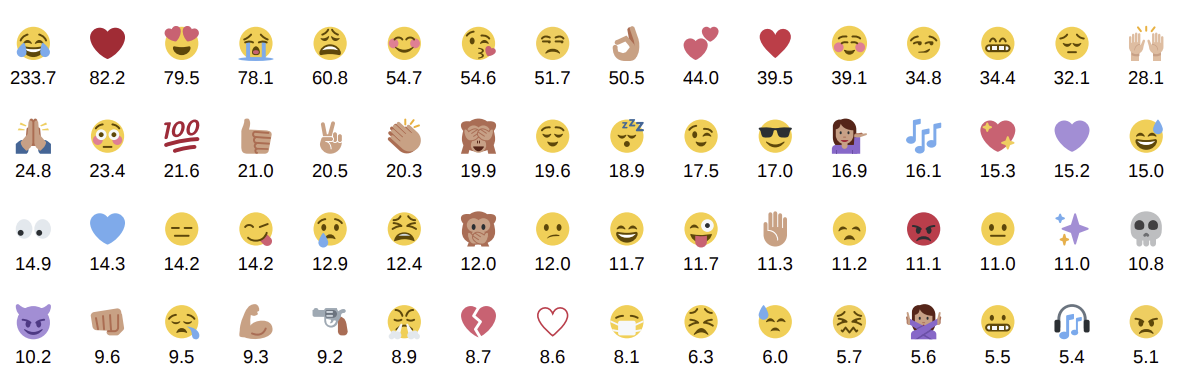

# Plot length of conversations and sentences

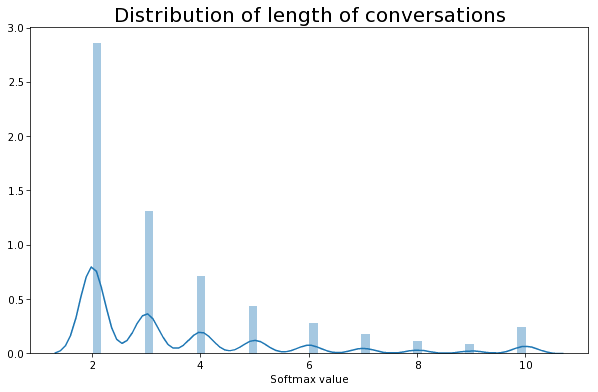

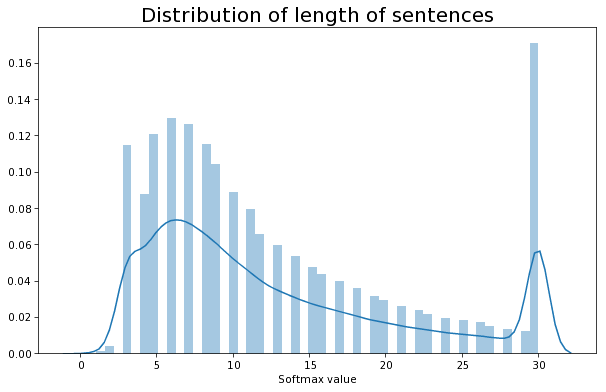

In [32]:
train_conv_len = pickle.load(open('datasets/cornell/train/conversation_length.pkl', 'rb'))
train_sent_len_pkl = pickle.load(open('datasets/cornell/train/sentence_length.pkl', 'rb'))
train_sent_len = [s_len for conv in train_sent_len_pkl for s_len in conv] 

# Plot histogram of number of sentences/conversations
# Input:
# list of values
def plot_sent_length_hist(inp, ttl):
    plt.figure(figsize=(10,6))
    sns.distplot(inp)
    plt.title('Distribution of length of '+ttl, fontsize=20)
    plt.xlabel('Softmax value')

#     plt.savefig('emoji_pobs.png')
    plt.show()

plot_sent_length_hist(train_conv_len, 'conversations')
plot_sent_length_hist(train_sent_len, 'sentences')


# Legacy

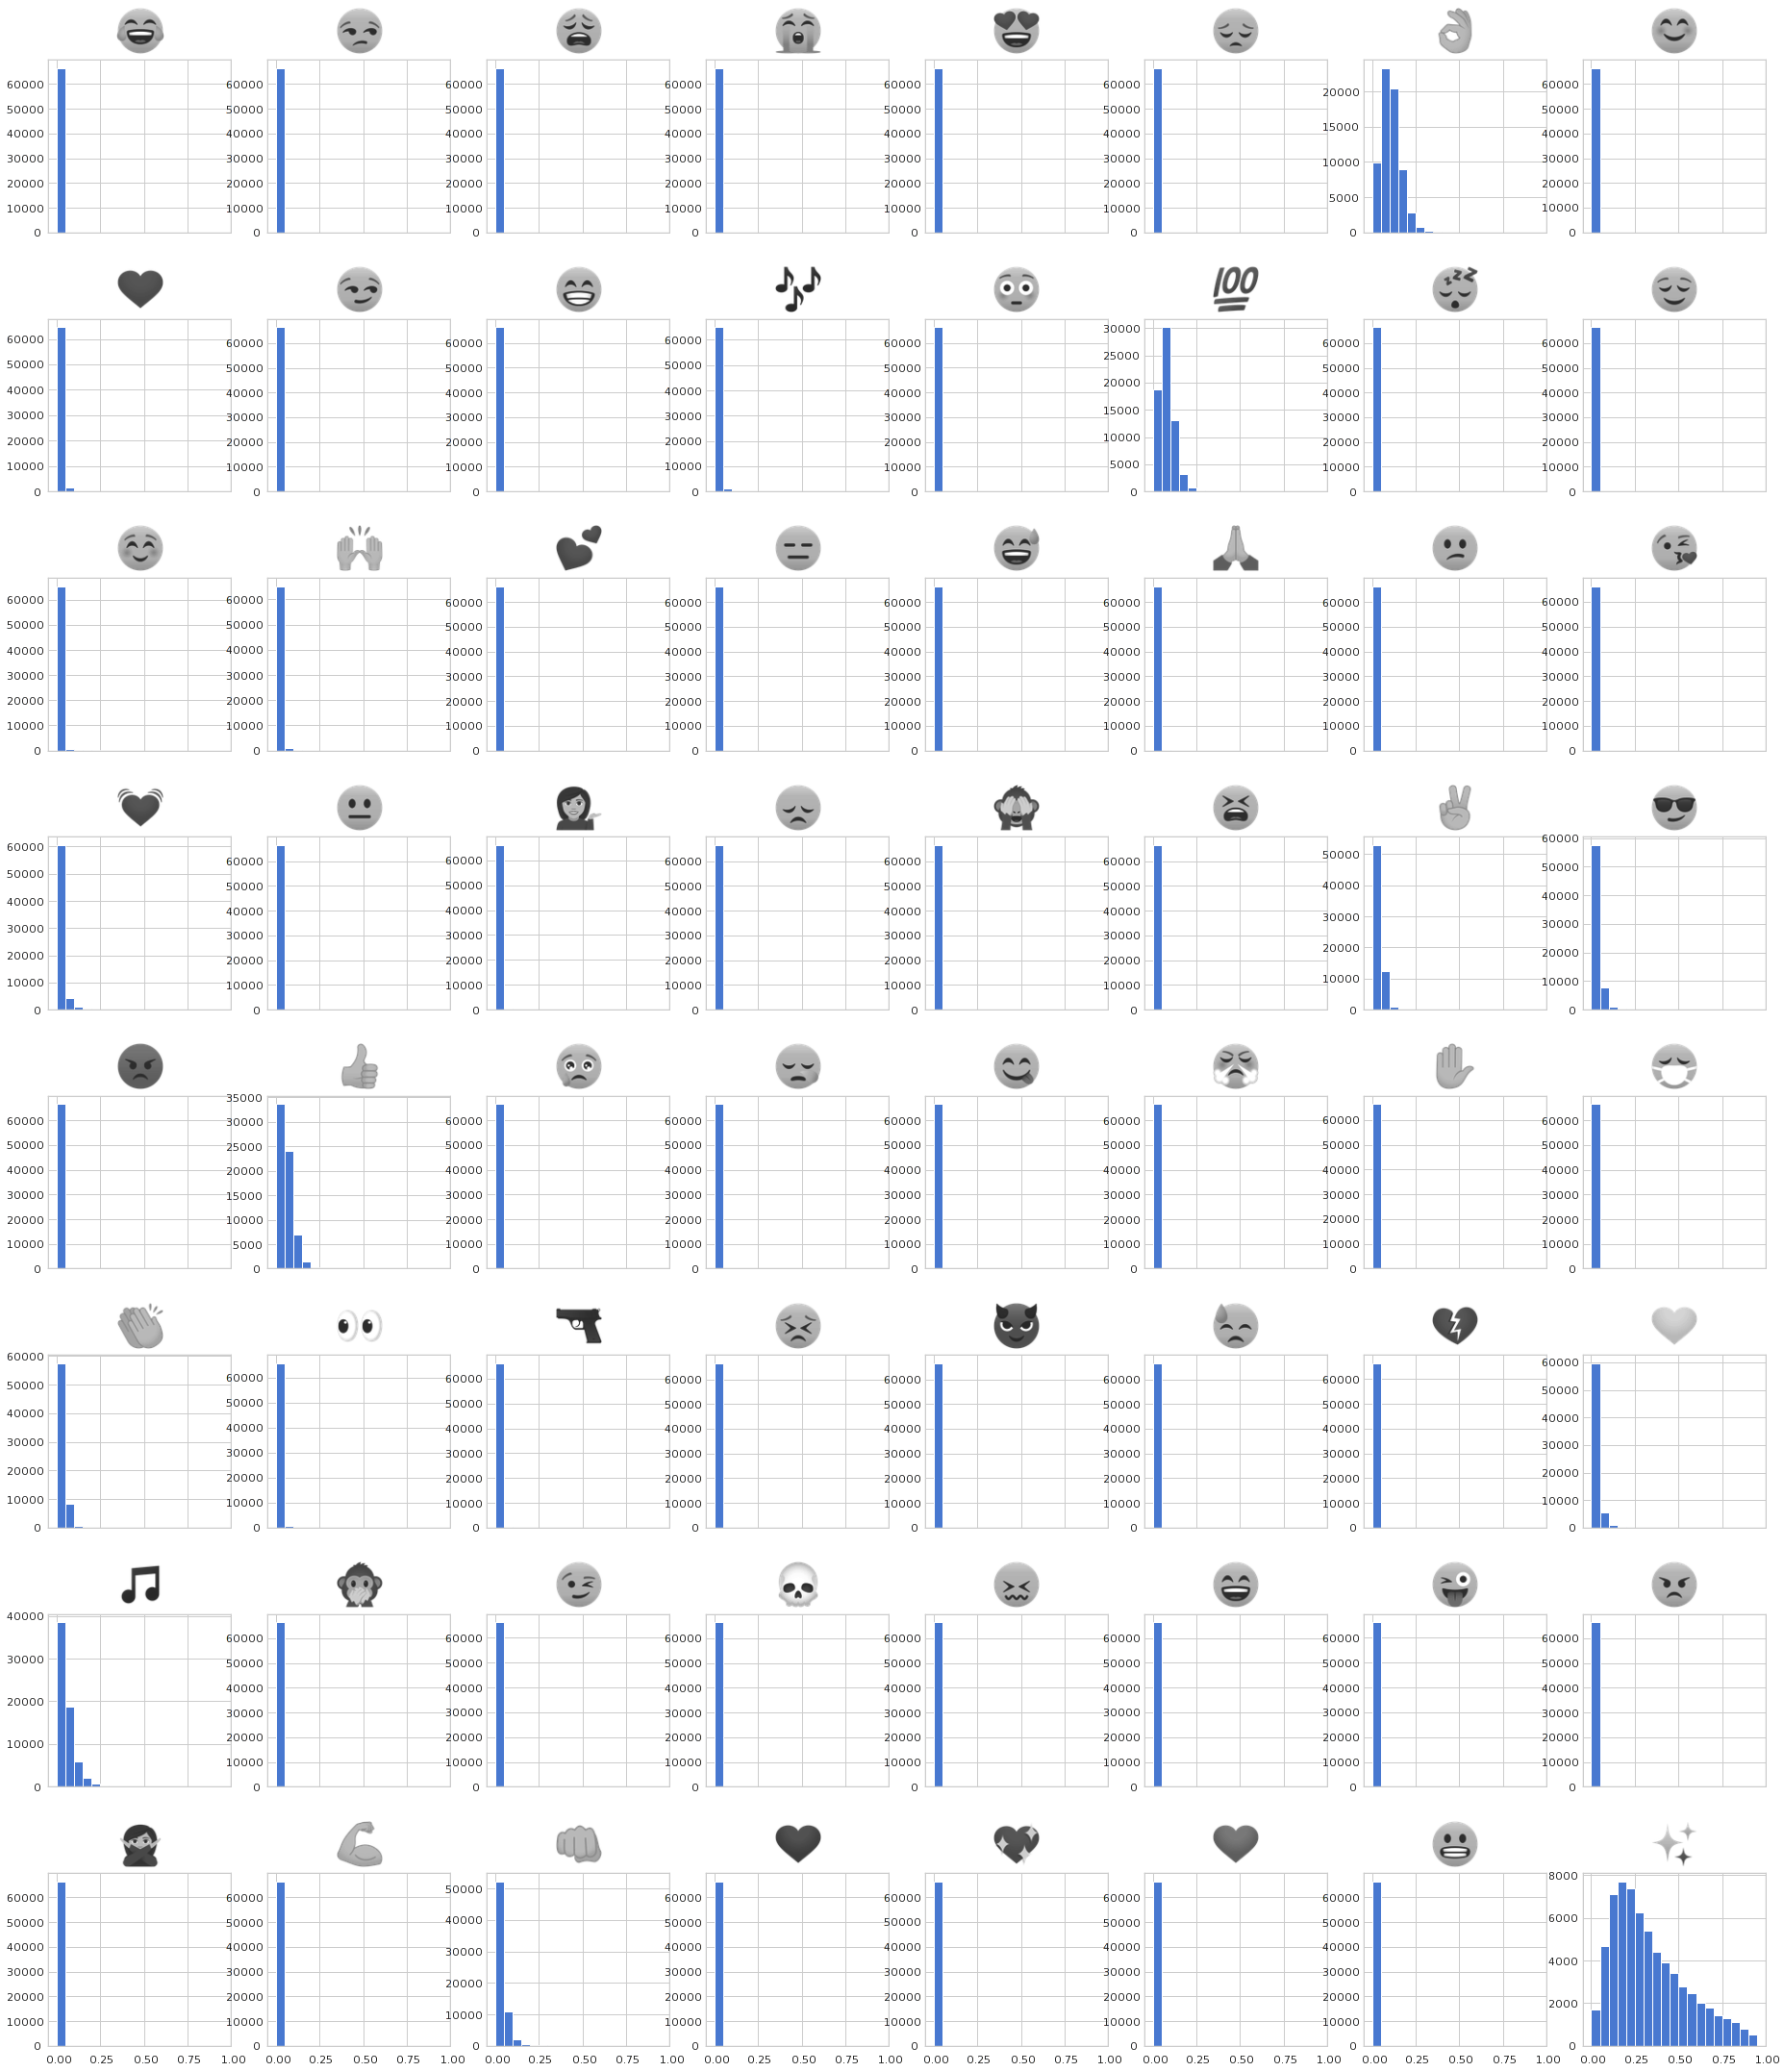

In [7]:
# Plot emoji distribution
# Input: an array of X*64
def plot_emoji_dist_matplot(probs):
    _bins = np.arange(0.0,1.0,0.05)
    font_prop = font_manager.FontProperties(fname='/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/apple/emojione-mac.ttc')
    font = {'fontproperties': font_prop, 'fontsize': 50}
    f, axes = plt.subplots(8, 8, figsize=(32, 38), sharex=True)
    plt.subplots_adjust(hspace=0.5)

    for i in range(len(EMOJIS)):
        ax=axes[int(i/8), int(i%8)]
        ax.hist(probs[:, i], bins=_bins)
        ax.set_title(emoji.emojize(EMOJIS[i], use_aliases=True), **font)
#     plt.savefig('emoji_pobs.png')
    plt.show()
    
plot_emoji_dist_matplot(np.asarray(train_probs))


# What is the distribution of top 1 predicted emoji?

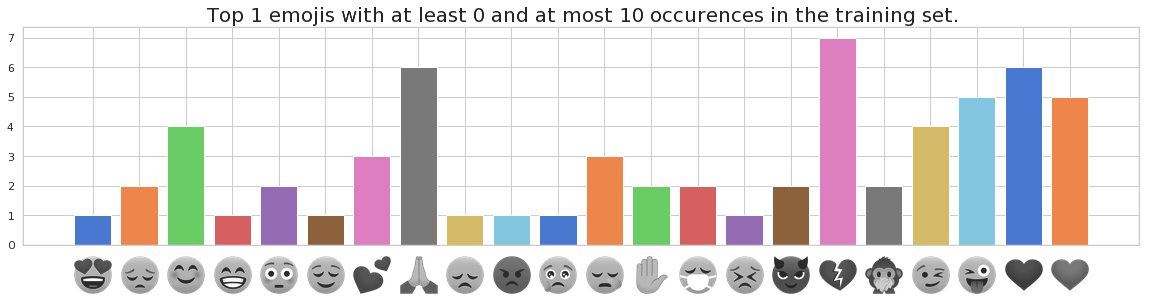

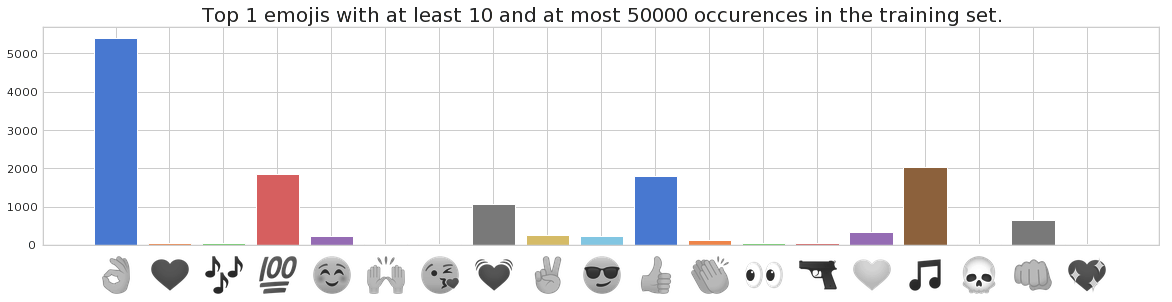

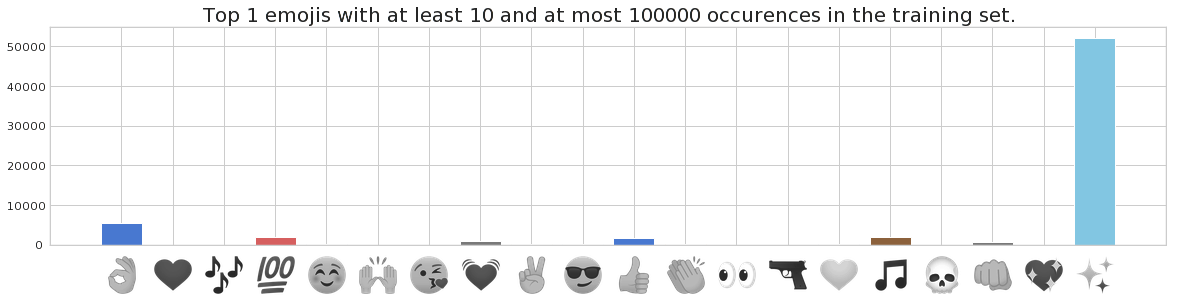

In [8]:
# Plot top 1 emoji distribution
# Input: an array of X*64

def plot_top1_emoji(probs, min_t, max_t):
    _bins = range(len(EMOJIS))
    font_prop = font_manager.FontProperties(fname='/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/apple/emojione-mac.ttc')
    font = {'fontproperties': font_prop, 'fontsize': 40}
    plt.figure(figsize=(20,4))
    frequencies = collections.Counter(np.argmax(probs, axis=1))
    keys = [key for key in range(len(EMOJIS)) if frequencies[key]>min_t and frequencies[key]<max_t]
    for idx, key in enumerate(keys):
        plt.bar(idx, frequencies[key])
    plt.xticks(range(len(keys)), [emoji.emojize(EMOJIS[i], use_aliases=True) for i in keys], **font)
    plt.title(f'Top 1 emojis with at least {min_t} and at most {max_t} occurences in the training set.', fontsize=20)

#     plt.savefig('emoji_pobs.png')
    plt.show()

plot_top1_emoji(np.asarray(train_probs), 0, 10)
plot_top1_emoji(np.asarray(train_probs), 10, 50000)
plot_top1_emoji(np.asarray(train_probs), 10, 100000)


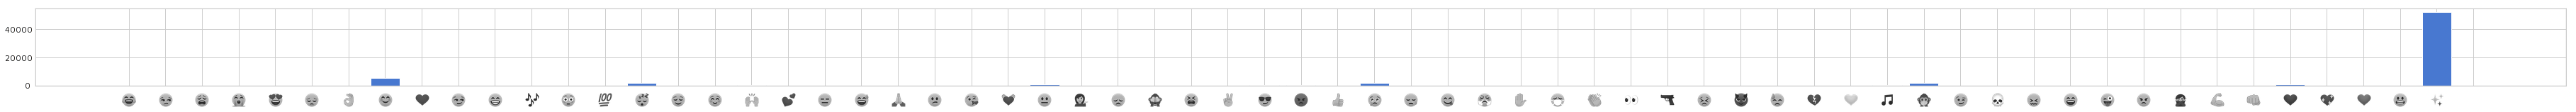

In [9]:
# Plot top 1 emoji distribution
# Input: an array of X*64
def plot_top1_emoji_dist_matplot(probs):
    _bins = range(len(EMOJIS))
    font_prop = font_manager.FontProperties(fname='/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/apple/emojione-mac.ttc')
    font = {'fontproperties': font_prop, 'fontsize': 20}
    plt.figure(figsize=(64,2))
    plt.hist(np.argmax(probs, axis=1), bins=_bins, rwidth=0.8, align='mid')
    plt.xticks(np.arange(-0.5, 64, 1.0), [emoji.emojize(EMOJIS[i], use_aliases=True) for i in _bins], **font)

#     plt.savefig('emoji_pobs.png')
    plt.show()
    
plot_top1_emoji_dist_matplot(np.asarray(train_probs))


In [10]:
# import cairocffi
# import matplotlib
# print('Default backend: ' + matplotlib.get_backend()) 
# matplotlib.use("module://cairocffi")
# print('Backend is now ' + matplotlib.get_backend())

font_prop = font_manager.FontProperties(fname='/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/apple/emojione-mac.ttc')
print (font_prop)

:family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/apple/emojione-mac.ttc:size=10.0


In [11]:
font_dirs = ['/mas/u/asma_gh/A-Hierarchical-Latent-Structure-for-Variational-Conversation-Modeling/fonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
print (font_list)

# font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

[<Font 'Noto Sans Myanmar UI' (NotoSansMyanmarUI-CondensedExtraLight.ttf) normal normal 400 normal>, <Font 'Noto Serif Hebrew' (NotoSerifHebrew-ExtraCondensedLight.ttf) normal normal 400 normal>, <Font 'Noto Sans Georgian' (NotoSansGeorgian-Regular.ttf) normal normal 400 normal>, <Font 'Noto Serif Khmer' (NotoSerifKhmer-SemiCondensedSemiBold.ttf) normal normal 400 normal>, <Font 'Noto Sans Georgian' (NotoSansGeorgian-Condensed.ttf) normal normal 400 normal>, <Font 'Noto Sans Display' (NotoSansDisplay-ExtraCondensedItalic.ttf) italic normal 400 normal>, <Font 'Noto Sans' (NotoSans-ExtraBoldItalic.ttf) italic normal 400 normal>, <Font 'Noto Serif Lao' (NotoSerifLao-SemiCondensed.ttf) normal normal 400 normal>, <Font 'Noto Sans Myanmar UI' (NotoSansMyanmarUI-ExtraCondensedBlack.ttf) normal normal 400 normal>, <Font 'Noto Serif Thai' (NotoSerifThai-ExtraBold.ttf) normal normal 400 normal>, <Font 'Noto Serif Malayalam' (NotoSerifMalayalam-Bold.ttf) normal normal 700 normal>, <Font 'Noto San